<h1 align=center> &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; 数据可视化 - 美国人的死因分析</h1>

# 美国人是怎么死的? 死亡率之可视化

**死亡** 一个可怕的主题，也是一个政府相当关心的主题。

在美国，疾病控制和预防中心（CDC）统计了一份从1999年至2015年的数据。这份数据信息量很丰富，包括死亡年龄、死因、性别甚至种族和地理城市。

对于这些数据，我们有下面三个问题 :
- 美国最大的死因是什么? 
- 男人比女人更容易死吗? 死亡与年龄相关吗? 
- 随着时间的推移，哪些死因变得更加流行，哪些死因变得少见？

#### 学习数据可视化

**matplotlib**，python最流行的数据可视化包之一。

有很多不同方式去使用matplotlib，在此只介绍最基础的。如果你有兴趣，更多内容见文档[here](http://matplotlib.org/).

<a id="mpl"></a>
## 载入 `本作业所需的第三方` 库

In [11]:
import matplotlib

<a id="getdata"></a>
## 获得数据

读取 `deaths.csv`文件内容:（注意字符编码为'GBK'）

In [3]:
csv = open('deaths.csv',encoding='GBk').read()


很好! 现在数据都在变量**`df`**内了

<a id="understand"></a>
## 理解数据

#### 输出前10行:

,Cause,CauseCN,Code-ICD-10-113,Age,Gender,Year,Deaths,Population,Crude Rate
0,Salmonella infections,沙门氏菌感染,GR113-001,0,F,2005,0,1956682,Unreliable
1,Salmonella infections,沙门氏菌感染,GR113-001,0,F,2010,1,1929877,Unreliable
2,Salmonella infections,沙门氏菌感染,GR113-001,0,F,2015,3,1942904,Unreliable
3,Salmonella infections,沙门氏菌感染,GR113-001,1,F,2005,0,1950494,Unreliable
4,Salmonella infections,沙门氏菌感染,GR113-001,1,F,2010,0,1947217,Unreliable
5,Salmonella infections,沙门氏菌感染,GR113-001,1,F,2015,0,1939269,Unreliable
6,Salmonella infections,沙门氏菌感染,GR113-001,2,F,2005,0,1932337,Unreliable
7,Salmonella infections,沙门氏菌感染,GR113-001,2,F,2010,0,2004731,Unreliable
8,Salmonella infections,沙门氏菌感染,GR113-001,2,F,2015,0,1939979,Unreliable
9,Salmonella infections,沙门氏菌感染,GR113-001,3,F,2005,0,1930395,Unreliable


####输出倒数5行:

,Cause,CauseCN,Code-ICD-10-113,Age,Gender,Year,Deaths,Population,Crude Rate
30901,Enterocolitis due to Clostridium difficile,由于艰难梭菌引起的小肠结肠炎,GR113-136,99,M,2010,6,Not Applicable,Not Applicable
30902,Enterocolitis due to Clostridium difficile,由于艰难梭菌引起的小肠结肠炎,GR113-136,99,M,2015,7,Not Applicable,Not Applicable
30903,Enterocolitis due to Clostridium difficile,由于艰难梭菌引起的小肠结肠炎,GR113-136,100,M,2005,8,Not Applicable,Not Applicable
30904,Enterocolitis due to Clostridium difficile,由于艰难梭菌引起的小肠结肠炎,GR113-136,100,M,2010,4,Not Applicable,Not Applicable
30905,Enterocolitis due to Clostridium difficile,由于艰难梭菌引起的小肠结肠炎,GR113-136,100,M,2015,14,Not Applicable,Not Applicable


#### 死亡年龄的汇总情况（各种统计数据）

count    30906.000000
mean        50.000000
std         29.155231
min          0.000000
25%         25.000000
50%         50.000000
75%         75.000000
max        100.000000
Name: Age, dtype: float64

#### 数据集涉及了哪几个年份?

array([2005, 2010, 2015])

#### 确认性别是否只有男性male和女性female。

array(['F', 'M'], dtype=object)

#### 数据集中有哪些死因（要去除重复值，输出包括英文的和中文的）?

,Cause,CauseCN
0,Accidents (unintentional injuries),事故（意外伤害）
1,Acute bronchitis and bronchiolitis,急性支气管炎和细支气管炎
2,Acute poliomyelitis,急性脊髓灰质炎
3,Alzheimer's disease,阿尔茨海默氏病
4,Anemias,贫血
5,Aortic aneurysm and dissection,主动脉瘤和解剖
6,Arthropod-borne viral encephalitis,节肢动物传播的病毒性脑炎
7,Assault (homicide),袭击（杀人）
8,Atherosclerosis,动脉粥样硬化
9,Cerebrovascular diseases,脑血管疾病


<a id="year"></a>
## 死亡: 年份

####  2005, 2010，2015死亡人数分别为多少?

我们先按照年份进行分组，然后对**死亡数**列求和，就可以得到每年的死亡数

Year
2005    2143662
2010    2102234
2015    2294942
Name: Deaths, dtype: int64

### 使用可视化的方法展示每年的死亡人数的情况对比

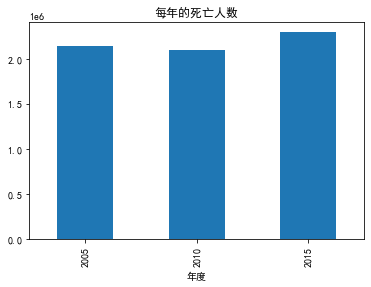

<a id="gender"></a>
## 死亡: 男性 vs. 女性

### 在2015年，每个性别死亡人数？

Gender
F    1103789
M    1191153
Name: Deaths, dtype: int64

#### <font color="red"> 练习: </font>你可以创建一个简单的图来表示每个性别的死亡总数吗?

注意，使用2015年的数据。

让我们给图上色: <font color=red>红色</font>表示女性<font color=blue>蓝色</font>表示男性.
我们可以这样添加颜色：
> `.plot(kind = "bar", ` **`color = ["red", "blue"]`**`)`

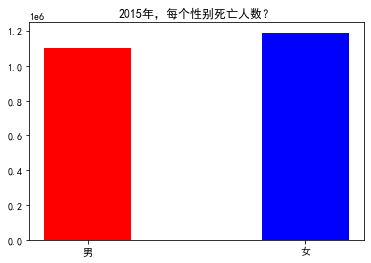

<a id="age"></a>
## 死亡: 年龄

2015年死亡人员的年龄情况？

上面这张图比较难观察，太小了！

我们可以增大图的尺寸
> `.plot(kind = "bar",`** figsize = [18,6]**`)`

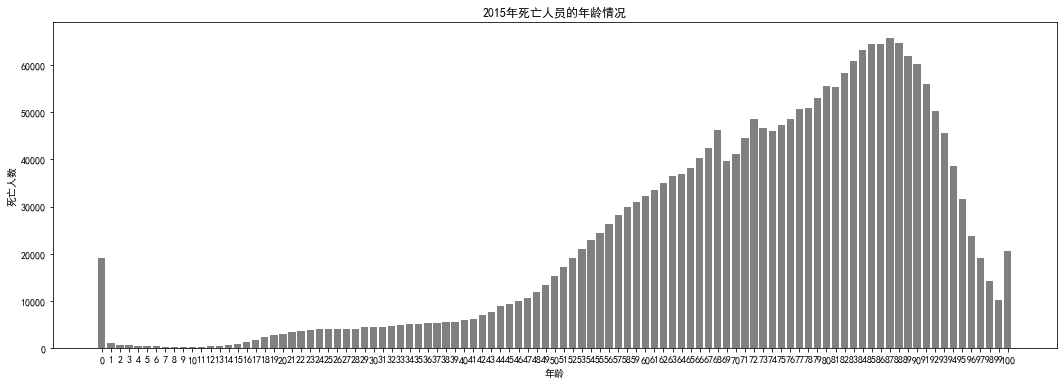

<font color="green"> 讨论: 你从图中发现了什么? </font>

<a id="ageXgender"></a>
## 死亡: 年龄和性别

#### 死亡年龄与性别有关吗？

根据两个变量进行分组：
> `.groupby(`**`["Age", "Gender"]`**`)`

Age  Gender
0    F          8634
     M         10512
1    F           470
     M           645
2    F           335
               ...  
98   M          3669
99   F          7685
     M          2506
100  F         16615
     M          3985
Name: Deaths, Length: 202, dtype: int64

#### 让我们创建两个子图，分别是女性和男性的死亡年龄。
> ...  
> **`.unstack(1)`**`\`  
> `.plot(kind = "bar", ` **` subplots = True`**`)`

#### 因为年龄是数值变量，所以使用折线图可能更加容易对比:
> `.plot(kind = "`**`line`**`")`

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fca61a2a990>,
      dtype=object)

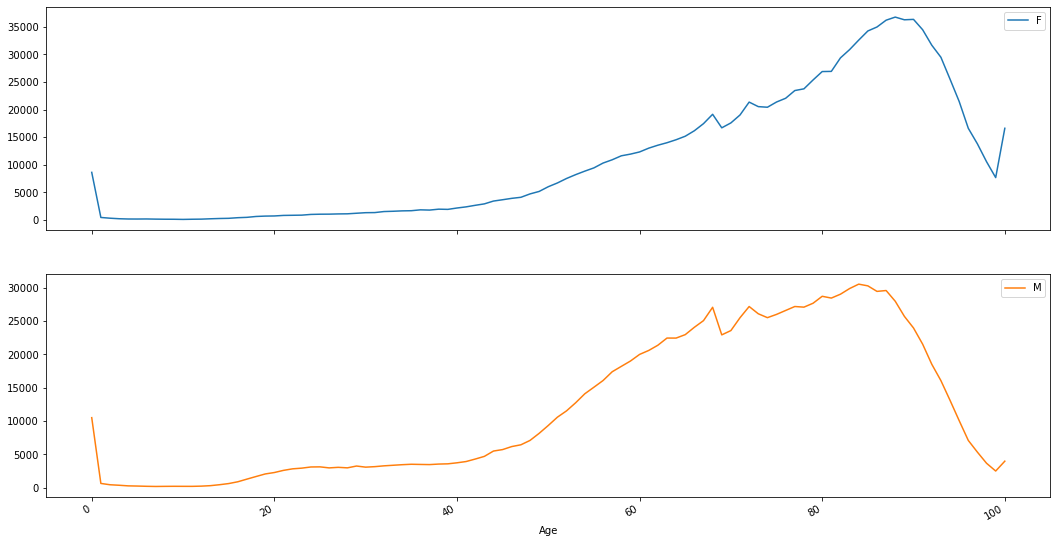

有了曲线之后，对比变得方便了，我们要把两根线同时绘制到一张图:


让我们增加一个题目和y坐标的名称。

> `.plot(kind = "line",` **`title = "Deaths in 2015 by Age and Gender"`**`)`


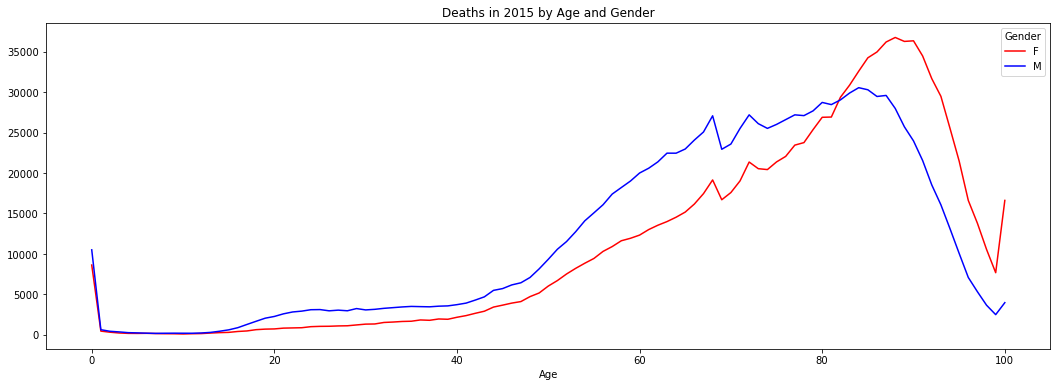

<a id="causeX2015"></a>
## 死亡: 2015年最大死因

让我们查看一下2015年最大的死因。

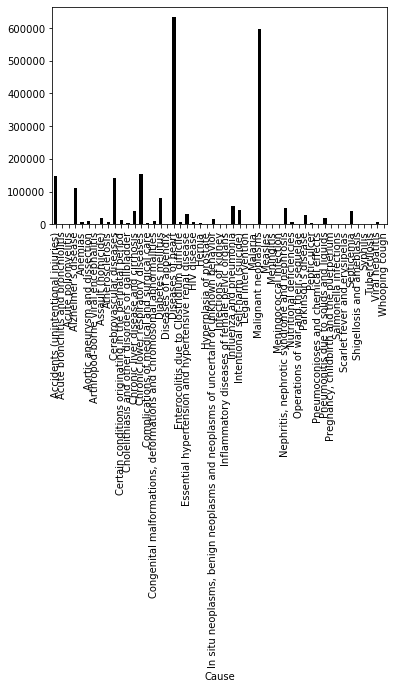

这张图观察起来非常困难，我们需要先对数据**排序**，然后将图表**旋转90度**。
1. 数据排序:
> **`.sort('Deaths', ascending = True)`**

2. 创建水平柱状图 
plt.barh()
> 

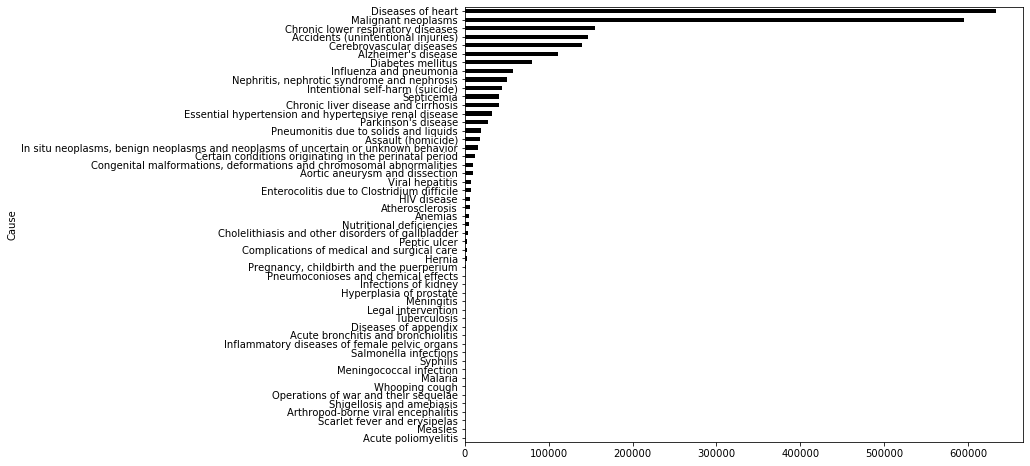

#### 让我们找出2015年十大死因

我们可以在排序后取最后的10个死因:
>`.sort('Deaths', ascending = True)`**`[-10:]`**`\`

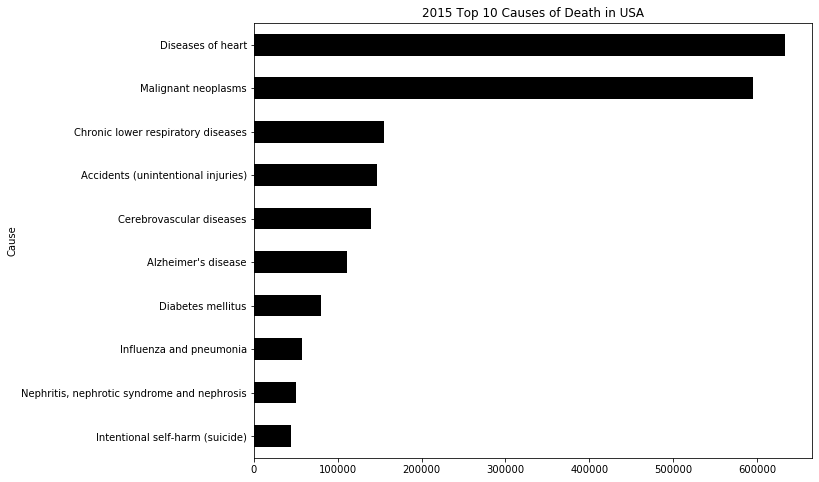

<a id="causeXgender"></a>
## 死亡: 跟性别有关的死因
### 计算出每个年龄及死因的死亡人数

,Cause,Gender,Deaths
0,Accidents (unintentional injuries),F,53648
1,Accidents (unintentional injuries),M,92905
2,Acute bronchitis and bronchiolitis,F,154
3,Acute bronchitis and bronchiolitis,M,119
4,Acute poliomyelitis,F,0
...,...,...,...
97,Tuberculosis,M,307
98,Viral hepatitis,F,2484
99,Viral hepatitis,M,4977
100,Whooping cough,F,3


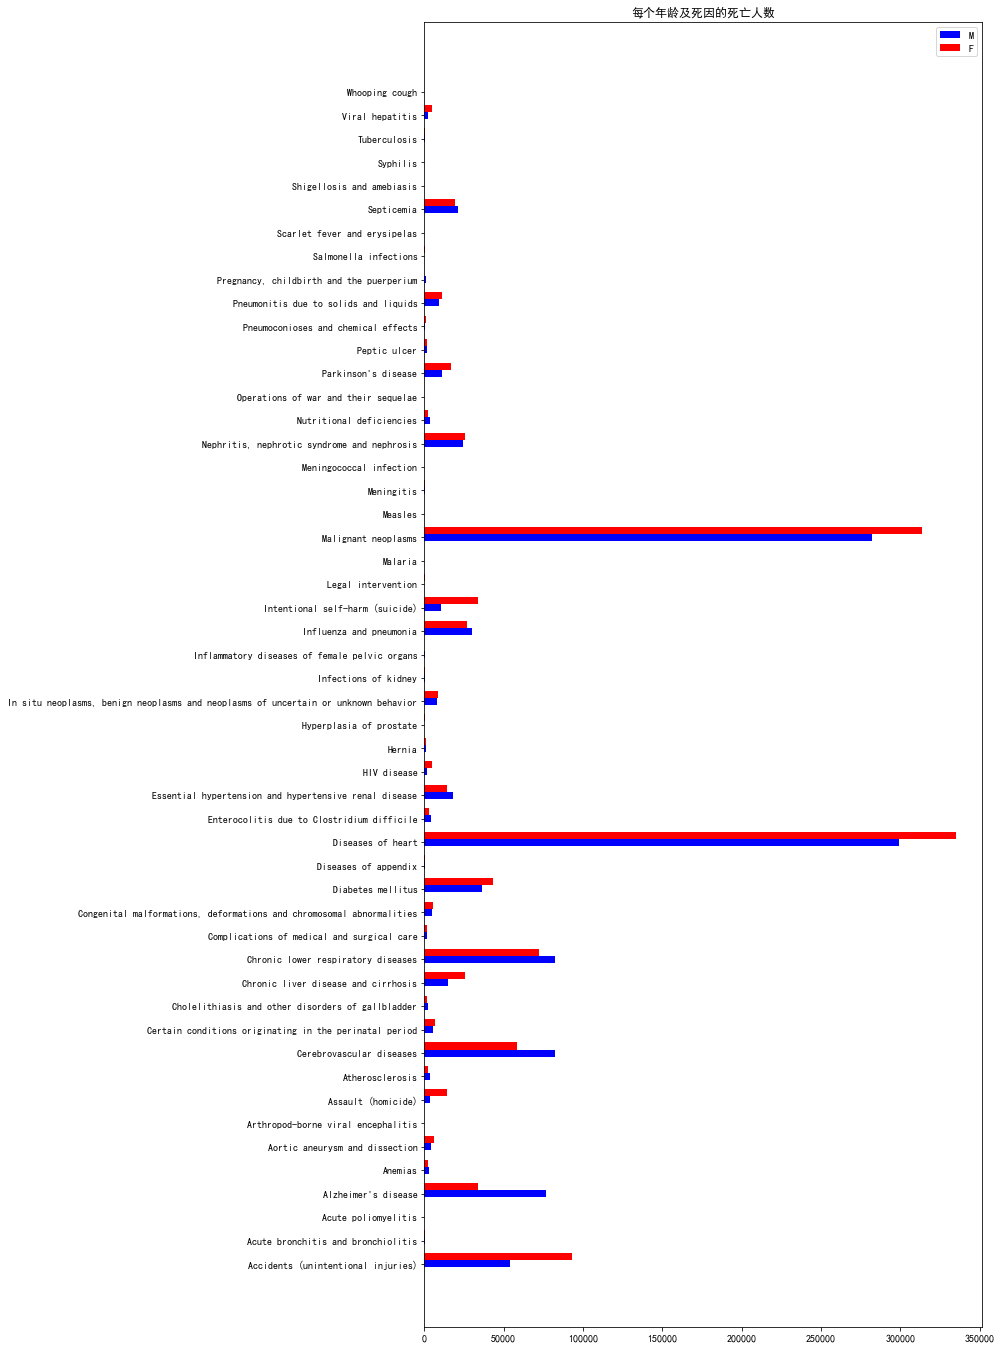